In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = 'GSE194078'

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read(DATA_PATH)

adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 110565 × 36601
    obs: 'patient', 'patient_id', 'disease', 'batch', 'dataset', 'cell_types'
    var: 'gene_ids', 'feature_types'

In [4]:
adata.var.head()

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [8]:
adata.obs['disease'] = ['MS' if x == 'MS' else 'HC' for x in adata.obs['disease']]
adata.obs['disease'].value_counts()

disease
HC    76349
MS    34216
Name: count, dtype: int64

In [9]:
adata.obs.head()

,patient,patient_id,disease,batch,dataset,cell_types
AAACCCACAAGACCGA-1-PBMC,GSM5827375,CYG,HC,0,GSE194078,PBMC
AAACCCACACGGCACT-1-PBMC,GSM5827375,CYG,HC,0,GSE194078,PBMC
AAACCCATCAGAATAG-1-PBMC,GSM5827375,CYG,HC,0,GSE194078,PBMC
AAACGAAAGGTAAAGG-1-PBMC,GSM5827375,CYG,HC,0,GSE194078,PBMC
AAACGAACACAGCCAC-1-PBMC,GSM5827375,CYG,HC,0,GSE194078,PBMC


In [14]:
adata.obs.describe()

,patient,patient_id,disease,batch,dataset,cell_types
count,110565,97324,110565,110565,110565,110565
unique,12,11,2,2,1,2
top,GSM5827380,KSH,HC,0,GSE194078,PBMC
freq,22578,22578,76349,61903,110565,61903


In [11]:
adata.obs['cell_types'].value_counts()

cell_types
PBMC    61903
CSF     48662
Name: count, dtype: int64

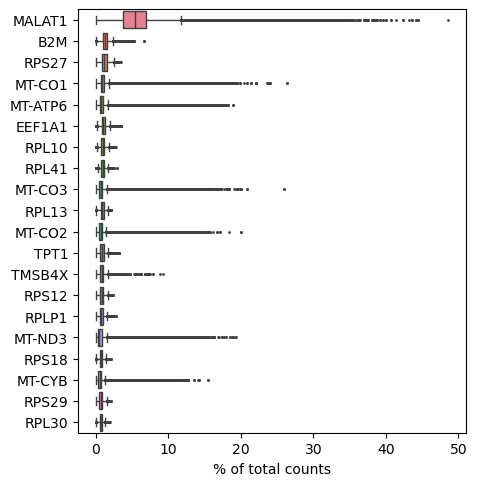

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20);

In [15]:
adata.obs['total_counts_genes'] = adata.X.sum(axis=1).A1

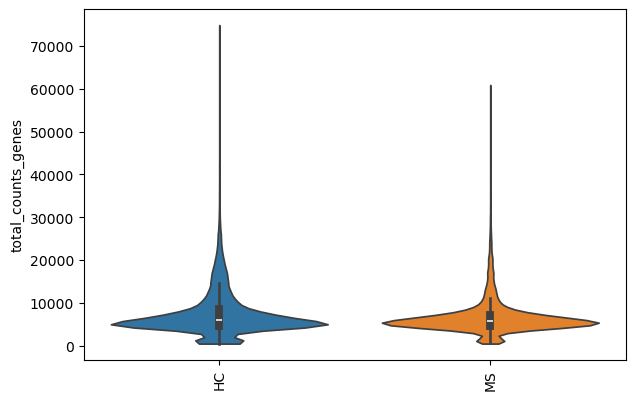

In [17]:
sc.pl.violin(
        adata, 
        keys=['total_counts_genes'],
        groupby='disease',
        stripplot=False,
        inner='box',
        rotation=90,
    );

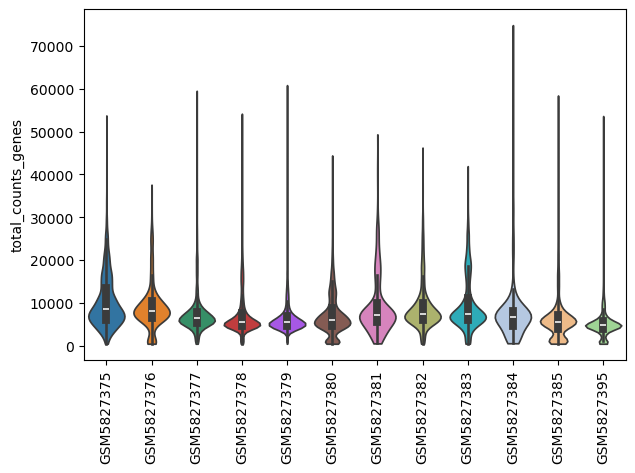

In [16]:
sc.pl.violin(
        adata,
        keys=['total_counts_genes'],
        groupby='patient',
        stripplot=False,
        inner='box',
        rotation=90,
    );

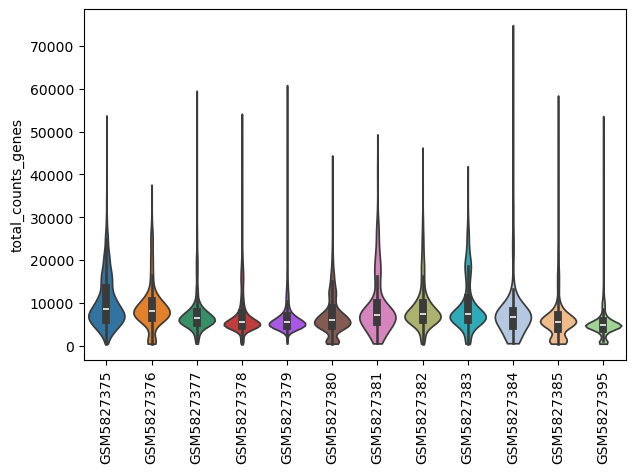

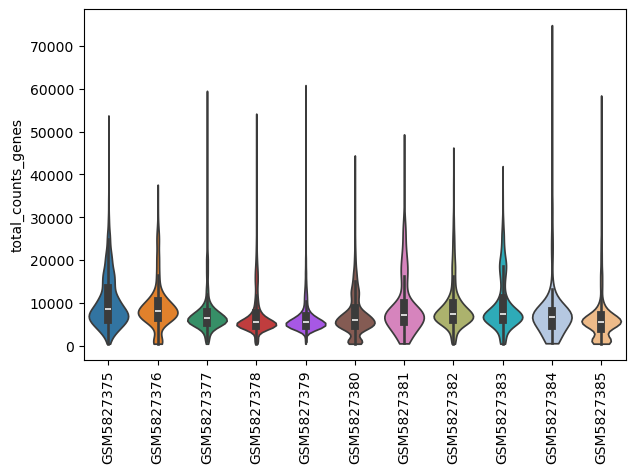

In [22]:
sc.pl.violin(
        adata[adata.obs['cell_types']=='PBMC'],
        keys=['total_counts_genes'],
        groupby='patient',
        stripplot=False,
        inner='box',
        rotation=90,
    );

sc.pl.violin(
        adata[adata.obs['cell_types']=='CSF'],
        keys=['total_counts_genes'],
        groupby='patient',
        stripplot=False,
        inner='box',
        rotation=90,
    );

In [18]:
# visualize patiant MS vs HC
adata[adata.obs['disease']=='MS'].obs['patient'].unique()

['GSM5827377', 'GSM5827379', 'GSM5827385']
Categories (3, object): ['GSM5827377', 'GSM5827379', 'GSM5827385']

In [19]:
adata[adata.obs['disease']=='HC'].obs['patient'].unique()

['GSM5827375', 'GSM5827376', 'GSM5827378', 'GSM5827380', 'GSM5827381', 'GSM5827382', 'GSM5827383', 'GSM5827384', 'GSM5827395']
Categories (9, object): ['GSM5827375', 'GSM5827376', 'GSM5827378', 'GSM5827380', ..., 'GSM5827382', 'GSM5827383', 'GSM5827384', 'GSM5827395']

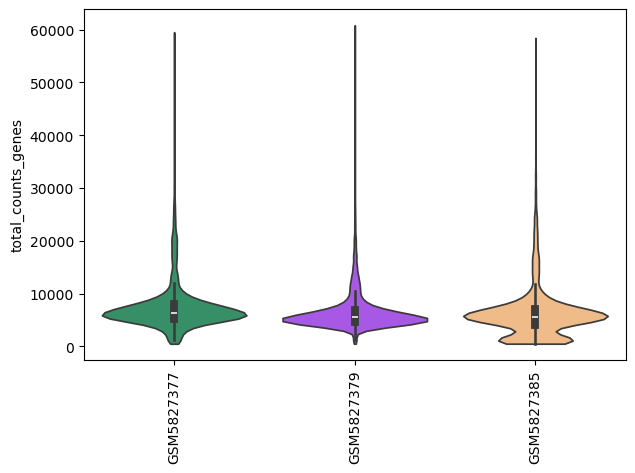

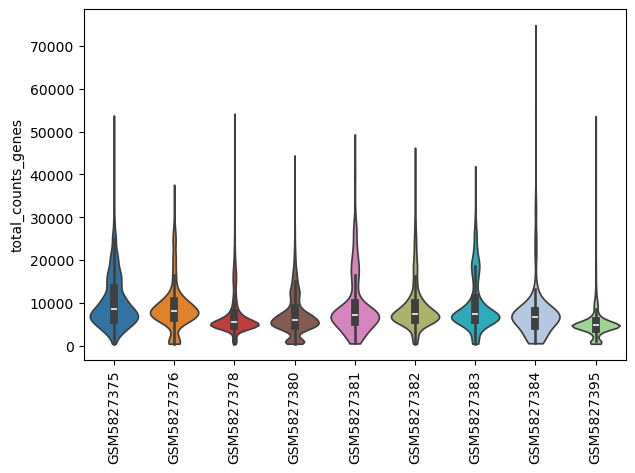

In [20]:
sc.pl.violin(
        adata[adata.obs['disease']=='MS'],
        keys=['total_counts_genes'],
        groupby='patient',
        stripplot=False,
        inner='box',
        rotation=90,
    );

sc.pl.violin(
        adata[adata.obs['disease']=='HC'],
        keys=['total_counts_genes'],
        groupby='patient',
        stripplot=False,
        inner='box',
        rotation=90,
    );